In [1]:
from sympy import symbols, init_printing, S
init_printing()
from celmech.poincare import Poincare, PoincareHamiltonian

In [2]:
import rebound
import numpy as np

def make_sim(j, k):
    mass = 1.e-5
    e0 = 0.001 # initial eccentricity of planets
    
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=mass, e=e0, P=1.)
    sim.add(m=4*mass, e=1.e-5, P=j/float(j-k), f=np.pi)
    sim.add(m=mass, e=e0, P=5.)
    sim.move_to_com()
    return sim

j=5
k=1
sim = make_sim(j,k)

In [3]:
pvars = Poincare.from_Simulation(sim)
Hsim = PoincareHamiltonian(pvars)

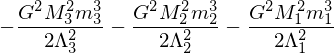

In [4]:
Hsim.H

In [5]:
Hsim.add_all_resonance_subterms(1,2,j,k)

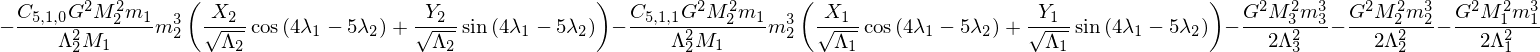

In [6]:
Hsim.H

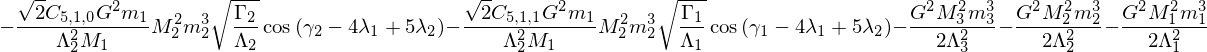

In [7]:
Hsim.Hpolar

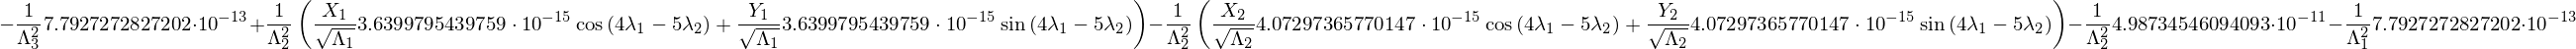

In [8]:
Hsim.NH

In [10]:
%%time
j=5
k=1
sim = make_sim(j,k)

Norbits = 300
Nout = 1000
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)

NLambda1s = np.zeros(Nout)
symLambda1s = np.zeros(Nout)
for i, time in enumerate(times):
    sim.integrate(time)
    Hsim.integrate(time)
    NLambda1s[i] = Poincare.from_Simulation(sim).particles[1].Lambda
    symLambda1s[i] = Hsim.state.particles[1].Lambda

CPU times: user 359 ms, sys: 0 ns, total: 359 ms
Wall time: 357 ms


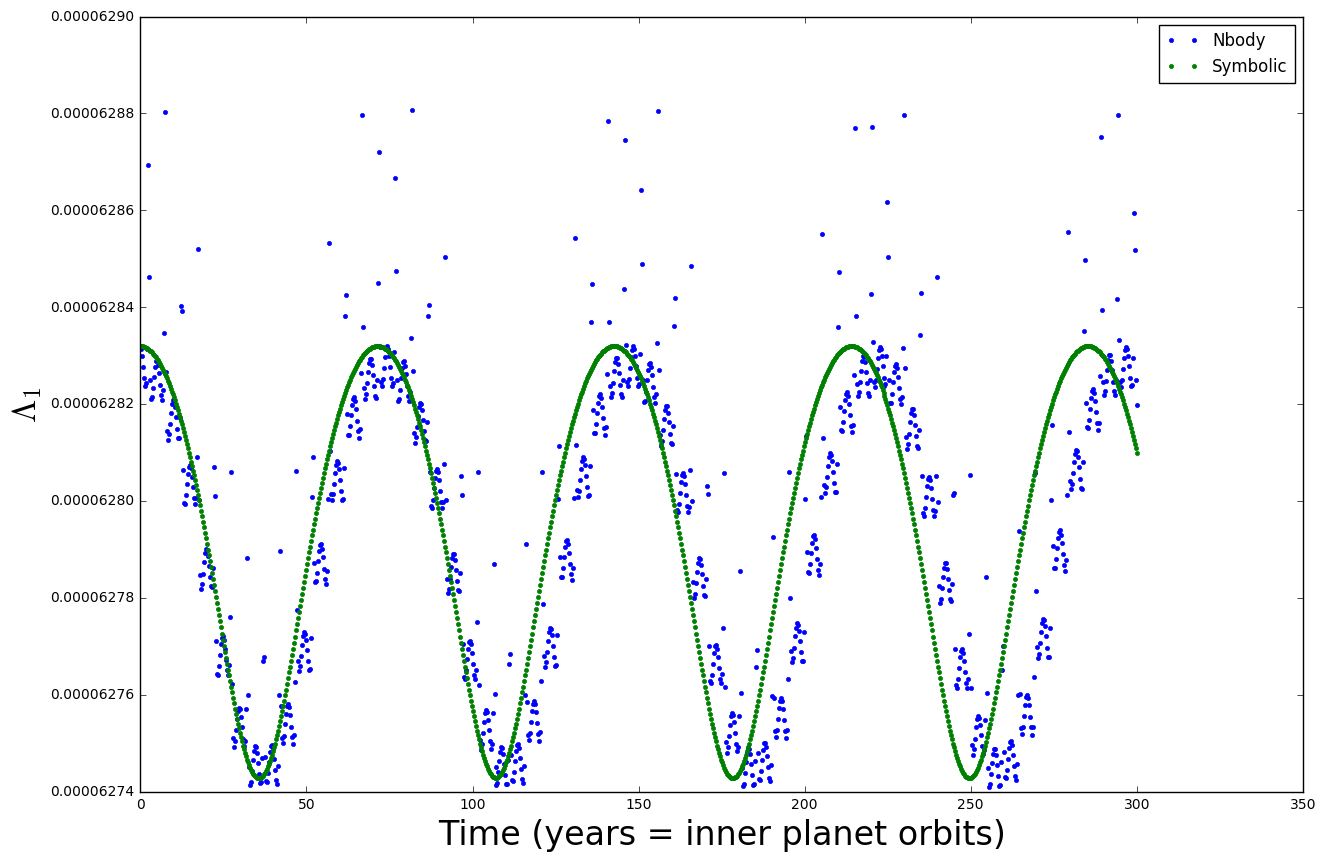

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Time (years = inner planet orbits)", fontsize=24)
ax.set_ylabel(r"$\Lambda_1$", fontsize=24)

ax.plot(times, NLambda1s, '.', label='Nbody')
ax.plot(times, symLambda1s, '.', label='Symbolic')

ax.legend()